# Lecture 9.3: PyTorch and Deep Neural Network

By courtesy of [Sayantini Deb](https://medium.com/edureka/pytorch-tutorial-9971d66f6893) and [Yunjey Choi](https://github.com/yunjey/pytorch-tutorial/tree/master/tutorials/03-advanced/neural_style_transfer#content-loss). Thanks for their nice work.

## 1. What is PyTorch?

It’s a Python-based scientific computing package targeted at two sets of audiences:

*   A replacement for NumPy to make use of the power of GPUs.

*   Deep Learning research platform that provides maximum flexibility and speed.

**Features of PyTorch — Highlights**

1. Native support for Python and use of its libraries
2. Actively used in the development of Facebook for all of its Deep Learning requirements in the platform.
3. PyTorch ensures an easy-to-use API which helps with easier usability and better understanding when making use of the API.
4. Dynamic Computation Graphs are a major highlight here as they ensure the graph build-up dynamically — at every point of code execution, the graph is built along and can be manipulated at run-time.
5. PyTorch is fast and feels native, hence ensuring easy coding and fast processing.
6. The support for CUDA ensures that the code can run on the GPU, thereby decreasing the time needed to run the code and increasing the overall performance of the system.

**Installing PyTorch**

Move to this page https://pytorch.org/get-started/locally/, you can download and install PyTorch on your machine. It’s pretty straightforward based on the system properties such as the operating system or the package managers. It can be installed from the command prompt or within an IDE such as PyCharm. Note that the example here is the installation of PyTorch GPU version. You can also install the PyTorch CPU version on your machine by selecting the 'CPU' rather than 'CUDA'.

`Windows Installation`:

<table>
<td> 
<img src="./pytorch_install_conda.png" style="width:100;height:100px;"> <br>
</td> 
<td> 
<img src="./pytorch_install_pip.png" style="width:100;height:100px;"> <br>
</td>  
</table>

`Mac Installation`:
<table>
<td> 
<img src="./pytorch_install_conda_mac.png" style="width:100;height:100px;"> <br>
</td> 
<td> 
<img src="./pytorch_install_pip_mac.png" style="width:100;height:100px;"> <br>
</td>  
</table>


**Tensors**

Tensors are similar to NumPy’s $n$-dimensional arrays, with the addition being that tensors can also be used on a GPU to accelerate computing.

Let’s construct a simple tensor and check the output. First, let’s check out how we can construct a $5\times3$ matrix which is uninitiated:

In [1]:
import torch

x = torch.empty(5, 3)
print(x)

tensor([[2.8221e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00]])


Now let’s construct a randomly initialized matrix:

In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0618, 0.5255, 0.5822],
        [0.8353, 0.2721, 0.8620],
        [0.3650, 0.4907, 0.5568],
        [0.2270, 0.8552, 0.6208],
        [0.5979, 0.9330, 0.8561]])


Construct a tensor directly from data:

In [3]:
x = torch.tensor([5.5, 3]) 
print(x)

tensor([5.5000, 3.0000])


**Tensor Operations**

There are multiple syntaxes for tensor operations. In the following example, we will take a look at the addition operation:

In [4]:
x = torch.rand(5, 3)
y = torch.rand(5, 3) 
print(x + y)

tensor([[1.3373, 1.5930, 1.0996],
        [0.2482, 0.8388, 0.6051],
        [1.1282, 1.1169, 0.7966],
        [0.3781, 1.2353, 0.4106],
        [1.0645, 1.7300, 0.9012]])


Resizing: If you want to reshape/resize a tensor, you can use `torch.view`:

In [5]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


**NumPy for PyTorch**

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

It is also used as:

*   Library providing tools for integrating C/C++ and FORTRAN code.
Operations with linear algebra, Fourier transforms, and random number capabilities.
*   Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data and arbitrary data types can be defined as well.

This allows NumPy to seamlessly and speedily integrate with a wide variety of databases!

Converting a Torch Tensor to a NumPy array and vice versa is a breeze!

<img src="./tensor-numpy.png" width = "500" height = "300" align=center />

The Torch Tensor and NumPy array will share their underlying memory locations and changing one will change the other.

In [6]:
# Converting A Torch Tensor To A NumPy Array:
a = torch.ones(5) 
print(a)

tensor([1., 1., 1., 1., 1.])


In [7]:
# Create a NumPy array:
b = a.numpy() 
print(b)

[1. 1. 1. 1. 1.]


Let’s perform a sum operation and check the changes in the values:

In [8]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [9]:
# Converting A NumPy Array To A Torch Tensor:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


So, as you can see, it is as simple as that!

Next, let’s look at an interesting and simple use case.

## 2. PyTorch Use Case: Training an Image Classifier

Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a Numpy array. Then you can convert this array into a ``torch.Tensor``.

*   For images, packages such as Pillow and OpenCV are useful.
*   For audio, packages such as Scipy and Librosa.
*   For text, either raw Python, Cython based loading or NLTK and SpaCy are useful.

Specifically for vision, there is a package called torchvision, that has data loaders for common data sets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR10 are of size $3\times32\times32$, i.e., $3$-channel color images of $32\times32$ pixels in size as shown below:

![CIFAR10](./CIFAR10.png)

**PyTorch: Training the CIFAR10 Classifier**

![Training The CIFAR10 Classifier](./frameworlk.png)

We will do the following steps in order:

1. Loading and normalizing CIFAR10.
2. Define a convolution neural network.
3. Define a loss function.
4. Train the network on the training data.
5. Test the network on the test data.

**Loading and Normalizing CIFAR10**

Using `torchvision`, it is very easy to load CIFAR10!

It is as simple as follows:

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

The outputs of torchvision datasets are PILImage images of range $[0, 1]$. We transform them to tensors of normalized range $[-1, 1]$.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', 
                                train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, 
                                batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, 
                                batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Next, let us print some training images from the dataset!

 deer   dog truck   cat


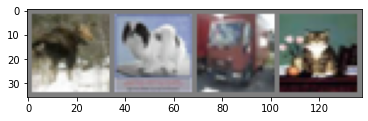

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# functions to show an image
 
 
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
 
 
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Define a Convolution Neural Network**

We will use `torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, bias=True)`, `torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)`, `torch.nn.Linear(in_features, out_features, bias=True)` and `torch.nn.functional.relu(input)` to build our CNN.

Consider the case to use $3$-channel images (red, green and blue). Here’s the code to define the architecture of the CNN:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
 
 
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    
    return x
 
net = Net()

**Define Loss Function and Optimizer**

We will need to define the loss function. In this case, we can make use of a classification cross-entropy loss. We’ll be using SGD with momentum as well.

In [ ]:
import torch.optim as optim
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**Train the Network**

This is when things start to get interesting! We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %
          (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
 
print('Finished Training')


[1,  2000] loss: 2.207
[1,  4000] loss: 1.881
[1,  6000] loss: 1.682
[1,  8000] loss: 1.569
[1, 10000] loss: 1.492
[1, 12000] loss: 1.455
[2,  2000] loss: 1.382
[2,  4000] loss: 1.343
[2,  6000] loss: 1.315
[2,  8000] loss: 1.305
[2, 10000] loss: 1.290
[2, 12000] loss: 1.254
Finished Training


**Test the Network on the Test Data**

We have trained the network for $2$ passes over the training dataset. But we need to check if the network has learned anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step! Let us display an image from the test set to get familiar.

GroundTruth:    cat  ship  ship plane


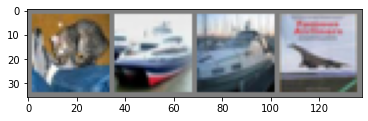

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
 
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the Neural Network thinks these examples above are:

In [ ]:
outputs = net(images)

The outputs are energies for the $10$ classes. Higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

In [ ]:
_, predicted = torch.max(outputs, 1)
 
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship plane


The results seem good.

Next, let us look at how the network performs on the whole dataset!

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
 
print('Accuracy of the network on the 10000 test images: %d %%' 
      % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


That looks better than chance, which is $10\%$ accurate (randomly picking a class out of $10$ classes).

It seems like the network learned something!

What are the classes that performed well and the classes that did not perform well?

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % 
        (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 48 %
Accuracy of  bird : 42 %
Accuracy of   cat : 30 %
Accuracy of  deer : 40 %
Accuracy of   dog : 58 %
Accuracy of  frog : 72 %
Accuracy of horse : 51 %
Accuracy of  ship : 59 %
Accuracy of truck : 65 %


So far, we made sure to train a small Neural Network which classifies images by using PyTorch and it turned out as expected!

Next, we will do some practices to define more complicated neural networks and accomplish some advanced functions.

## 3. VGG19

**The Architecture of VGG19:**

![VGG19](./VGG19.png)

More details about VGG19 can be found in [https://arxiv.org/pdf/1409.1556.pdf](https://arxiv.org/pdf/1409.1556.pdf).

**Load the Required Packages:**

In [ ]:
import time
import os

import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn


from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

import argparse

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # determine the device to train the model: CPU or GPU

**Get the CIFAR10 and Load the Dataset:**

In [ ]:
batch_size = 64
train_dataset = datasets.CIFAR10(root='data', 
                                 train=True, 
                                 transform=transforms.ToTensor(),
                                 download=True)

test_dataset = datasets.CIFAR10(root='data', 
                                train=False, 
                                transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False)


Files already downloaded and verified


**Define VGG19-Net:**

When building a convolution block, we usually include a convolution operation, a batch normalization operation, and an activation operation, where batch normalization can be operated by `torch.nn.BatchNorm2d`.

In [ ]:
import time
import os

import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn


from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

class VGG19(torch.nn.Module):
    def __init__(self,num_classes):
        super(VGG19, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,
                      kernel_size=(3,3),stride=(1,1),padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(), # this is different from `torch.nn.functional.relu`, which is a function, while nn.ReLU() is a class 
            nn.Conv2d(in_channels=64, out_channels=64, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )
        self.block5  = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, 
                      kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )
        self.classifier = nn.Sequential(
            nn.Linear(512*1*1,4096),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(4096,num_classes)
        )
    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        logits = self.classifier(x.view(-1,512*1*1))
        probas = F.softmax(logits,dim = 1)
        return logits,probas

In [ ]:
net =  VGG19(10)
print(net)
print(net(torch.randn([1,3,32,32])))


VGG19(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
 

**Define the Model and Optimizer:**

Here, we use Adam optimizer with learning rate $0.001$.

In [ ]:
NUM_EPOCHS = 15

model = VGG19(num_classes=10)

model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
valid_loader = test_loader

**Start Training:**

In [ ]:

def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        cross_entropy += F.cross_entropy(logits, targets).item()
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples
    

start_time = time.time()
train_acc_lst, valid_acc_lst = [], []
train_loss_lst, valid_loss_lst = [], []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    
    for batch_idx, (features, targets) in enumerate(train_loader):
    
        ### PREPARE MINIBATCH
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 300:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # no need to build the computation graph for backprop when computing accuracy
    model.eval()
    with torch.set_grad_enabled(False):
        train_acc, train_loss = compute_accuracy_and_loss(
                                    model, train_loader, device=DEVICE)
        valid_acc, valid_loss = compute_accuracy_and_loss(
                                    model, valid_loader, device=DEVICE)
        train_acc_lst.append(train_acc)
        valid_acc_lst.append(valid_acc)
        train_loss_lst.append(train_loss)
        valid_loss_lst.append(valid_loss)
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} \
                Train Acc.: {train_acc:.2f}%'
              f' | Validation Acc.: {valid_acc:.2f}%')
        
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')
  
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

Epoch: 001/015 | Batch 000/782 | Cost: 2.3260
Epoch: 001/015 | Batch 300/782 | Cost: 1.9064
Epoch: 001/015 | Batch 600/782 | Cost: 1.8141
Epoch: 001/015 Train Acc.: 28.69% | Validation Acc.: 28.83%
Time elapsed: 1.11 min
Epoch: 002/015 | Batch 000/782 | Cost: 1.8572
Epoch: 002/015 | Batch 300/782 | Cost: 1.7062
Epoch: 002/015 | Batch 600/782 | Cost: 1.5554
Epoch: 002/015 Train Acc.: 33.61% | Validation Acc.: 33.30%
Time elapsed: 2.15 min
Epoch: 003/015 | Batch 000/782 | Cost: 2.0059
Epoch: 003/015 | Batch 300/782 | Cost: 1.5630
Epoch: 003/015 | Batch 600/782 | Cost: 1.4625
Epoch: 003/015 Train Acc.: 44.97% | Validation Acc.: 44.77%
Time elapsed: 3.20 min
Epoch: 004/015 | Batch 000/782 | Cost: 1.2083
Epoch: 004/015 | Batch 300/782 | Cost: 1.2118
Epoch: 004/015 | Batch 600/782 | Cost: 1.0230
Epoch: 004/015 Train Acc.: 53.75% | Validation Acc.: 52.99%
Time elapsed: 4.26 min
Epoch: 005/015 | Batch 000/782 | Cost: 1.1121
Epoch: 005/015 | Batch 300/782 | Cost: 1.3405
Epoch: 005/015 | Batch 6

**Plot the Training Loss and Validation Loss:**

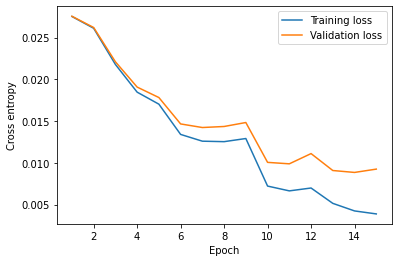

In [ ]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), valid_loss_lst, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()


**Test Phase and See the Model Performance**

In [ ]:
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')



Test accuracy: 82.44%


tensor([6, 7, 2, 2, 1, 3, 8, 6], device='cuda:0')


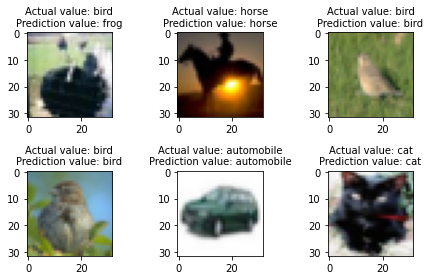

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
for features, targets in train_loader:
    break

_, predictions = model.forward(features[:8].to(DEVICE))
predictions = torch.argmax(predictions, dim=1)
print(predictions)

features = features[:7]
fig = plt.figure()
tname = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
         'dog', 'frog', 'horse', 'ship', 'truck']
# print(features[i].size())
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    tmp = features[i]
    plt.imshow(np.transpose(tmp, (1, 2, 0)))
    plt.title("Actual value: {}".format(tname[targets[i]])+
              '\n'+"Prediction value: {}".format(tname[predictions[i]]),size=10)
    
#     plt.title("Prediction value: {}".format(tname[targets[i]]))
plt.show()
